In [80]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [81]:
!kaggle datasets download -d bhavikjikadara/loan-status-prediction

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction
License(s): Attribution 4.0 International (CC BY 4.0)
loan-status-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [82]:
from zipfile import ZipFile
file_name = "loan-status-prediction.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('loan_data.csv')

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [86]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [88]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [90]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [91]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [92]:
df.duplicated().sum()

0

In [93]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [94]:
df=df.dropna()

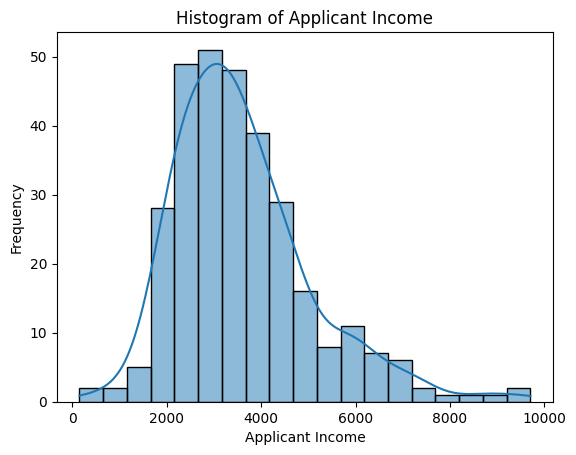

In [95]:
sns.histplot(df["ApplicantIncome"],kde=True)
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

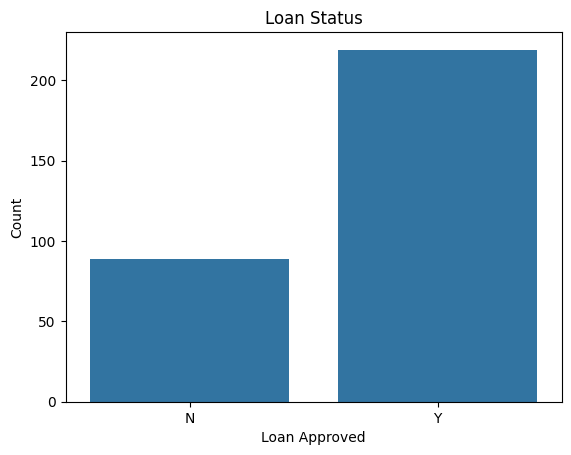

In [96]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

In [97]:
avg_loan_amount_by_education=df.groupby('Education')['LoanAmount'].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


<function matplotlib.pyplot.show(close=None, block=None)>

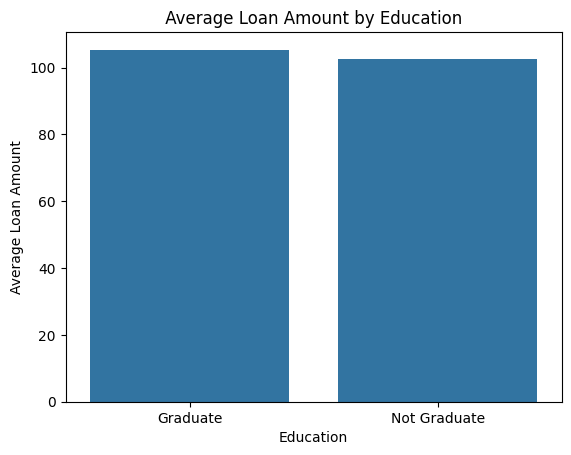

In [98]:
sns.barplot(x='Education',y='LoanAmount', data=avg_loan_amount_by_education)
plt.title(' Average Loan Amount by Education ')

plt.xlabel('Education')
plt.ylabel('Average Loan Amount')
plt.show

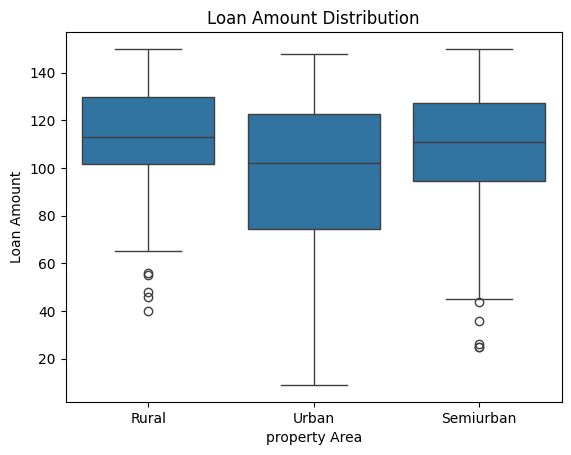

In [99]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=df)
plt.title('Loan Amount Distribution')
plt.xlabel('property Area')
plt.ylabel('Loan Amount')
plt.show()

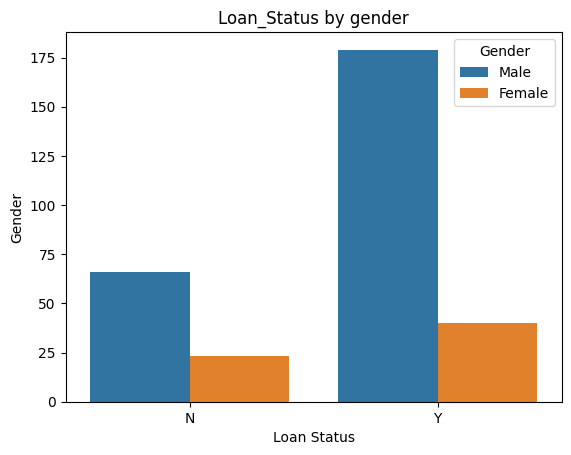

In [100]:
sns.countplot(x='Loan_Status', hue="Gender",data =df)
plt.title("Loan_Status by gender")
plt.xlabel('Loan Status')
plt.ylabel('Gender')
plt.show()

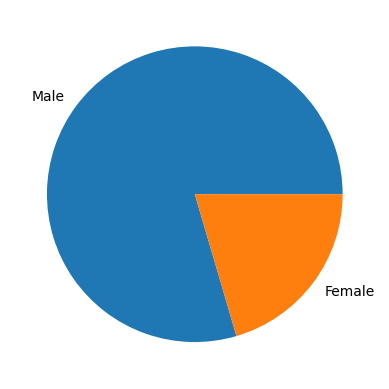

In [101]:
df['Gender'].value_counts().plot(kind='pie')
plt.ylabel("")
plt.show()

In [102]:
loan_status_by_married=df.groupby("Married")['Loan_Status'].value_counts().unstack()

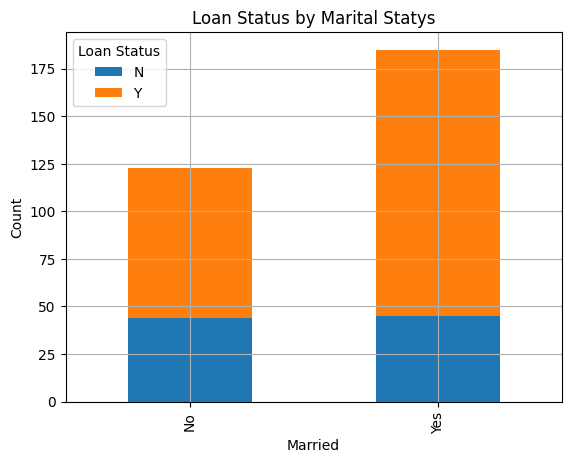

In [103]:
loan_status_by_married.plot(kind='bar',stacked=True)
plt.title('Loan Status by Marital Statys')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.grid()
plt.show()


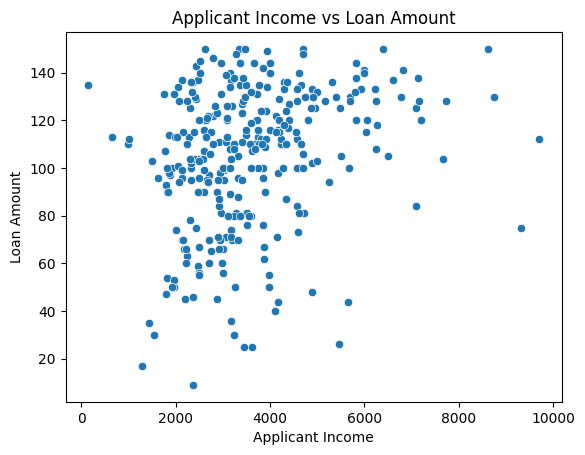

In [104]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [105]:
numeric_df=df.select_dtypes(include=['int64','float64'])
numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [106]:
corr=numeric_df.corr()

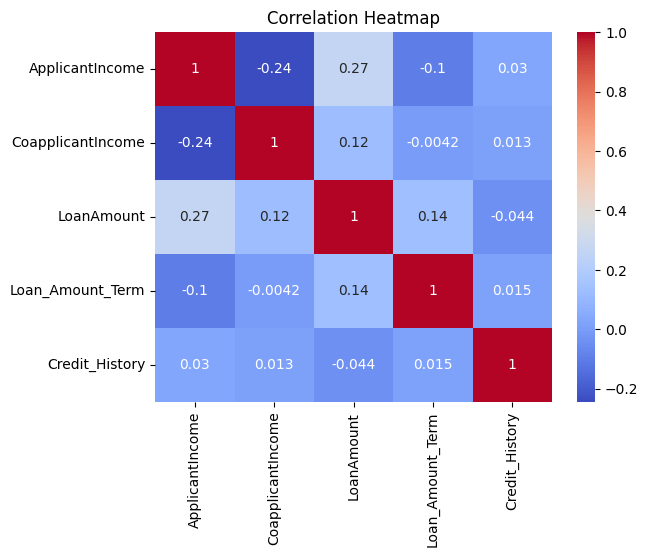

In [107]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [108]:
avg_loan_term_by_employed=df.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()

In [109]:
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


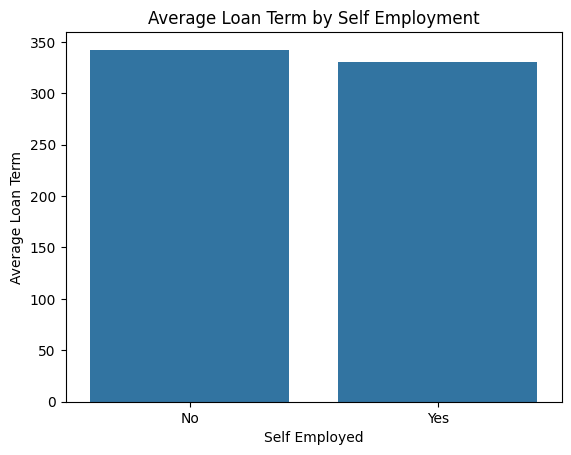

In [110]:
sns.barplot(x='Self_Employed',y='Loan_Amount_Term',data=avg_loan_term_by_employed)
plt.title('Average Loan Term by Self Employment')
plt.xlabel('Self Employed')
plt.ylabel('Average Loan Term')
plt.show()

In [111]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [112]:
x=df[['Married','Education','ApplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']]

In [113]:
x['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  84.,  36.])

In [114]:
y=df[['Loan_Status']]

In [115]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [116]:
y['Loan_Status']=labelencoder.fit_transform(y['Loan_Status'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15140\780656109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Loan_Status']=labelencoder.fit_transform(y['Loan_Status'])


In [117]:
# 0 is No
# 1 is Yes
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [118]:
x
#0 3500 1 100 1 360

,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term
0,Yes,Graduate,4583,128.0,1.0,360.0
1,Yes,Graduate,3000,66.0,1.0,360.0
2,Yes,Not Graduate,2583,120.0,1.0,360.0
3,No,Graduate,6000,141.0,1.0,360.0
4,Yes,Not Graduate,2333,95.0,1.0,360.0
...,...,...,...,...,...,...
376,Yes,Graduate,5703,128.0,1.0,360.0
377,Yes,Graduate,3232,108.0,1.0,360.0
378,No,Graduate,2900,71.0,1.0,360.0
379,Yes,Graduate,4106,40.0,1.0,180.0


In [119]:
x['Married']=labelencoder.fit_transform(x['Married'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15140\867591938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Married']=labelencoder.fit_transform(x['Married'])


In [120]:
labelencoder.classes_


array(['No', 'Yes'], dtype=object)

In [121]:
x['Education']=labelencoder.fit_transform(x['Education'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15140\2998131849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Education']=labelencoder.fit_transform(x['Education'])


In [122]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [123]:
x=scaler.fit_transform(x)

In [124]:
x


array([[ 0.81539246, -0.58734842,  0.67389339,  0.79689813,  0.41364557,
         0.27618914],
       [ 0.81539246, -0.58734842, -0.41036528, -1.31665281,  0.41364557,
         0.27618914],
       [ 0.81539246,  1.70256694, -0.6959849 ,  0.52418188,  0.41364557,
         0.27618914],
       ...,
       [-1.22640329, -0.58734842, -0.47885919, -1.14620515,  0.41364557,
         0.27618914],
       [ 0.81539246, -0.58734842,  0.34717742, -2.20298062,  0.41364557,
        -2.36561999],
       [-1.22640329, -0.58734842,  0.67389339,  0.96734579, -2.41752858,
         0.27618914]])

In [125]:
import joblib
joblib.dump(scaler, 'Scaler.pkl')

['Scaler.pkl']

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)


In [127]:
from sklearn.metrics import accuracy_score


In [128]:
def modelperformance(predictions):
    return accuracy_score(y_test,predictions)

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train.values.ravel())


LogisticRegression()

In [131]:
log_predictions=log_model.predict(x_test)

In [132]:
modelperformance(log_predictions)

0.8796296296296297

In [133]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={"n_neighbors":[1,2,3,4,5,6,7,8,9,10],"weights":['uniform','distance']}
knn_model=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_model.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [134]:
knn_model.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [135]:
knn_preds=knn_model.predict(x_test)

In [136]:
modelperformance(knn_preds)

0.8703703703703703

In [137]:
from sklearn.svm import SVC
svm = SVC()


In [138]:
param_grid_SVc={'C': [0.001,0.01,0.1, 0.5, 1, 10], 'gamma': [1, 0.1, 0.01,0.001], 'kernel': ['linear','rbf','poly']}

In [139]:
gridsvc= GridSearchCV(svm,param_grid_SVc)

In [140]:
gridsvc.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [141]:
pred_svc=gridsvc.predict(x_test)

In [142]:
modelperformance(pred_svc)

0.8796296296296297

In [143]:
gridsvc.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada_param_grid={"n_estimators": [1,2,3,4,5,6,7,8,9,10,20],
                "learning_rate": [0.001,0.005,0.01, 0.05,0.1,0.25,0.5,0.75,1]}
ada_grid_search= GridSearchCV(ada,ada_param_grid)

In [145]:
ada_grid_search.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.25,
                                           0.5, 0.75, 1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]})

In [146]:
adapreds=ada_grid_search.predict(x_test)

In [147]:
ada_grid_search.best_params_

{'learning_rate': 0.001, 'n_estimators': 1}

In [148]:
modelperformance(adapreds)

0.8796296296296297

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()


In [150]:
param_grid = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10,12,15], "n_estimators": [2, 5, 10, 20,30,40, 50, 70,90, 100,150,200]}
rfc_grid_search = GridSearchCV(rfc, param_grid)

In [151]:
rfc_grid_search.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
                         'n_estimators': [2, 5, 10, 20, 30, 40, 50, 70, 90, 100,
                                          150, 200]})

In [152]:
rfc_pred=rfc_grid_search.predict(x_test)

In [153]:
rfc_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 40}

In [154]:
modelperformance(rfc_pred)

0.8518518518518519

In [155]:

models = ['log_predictions','knn_preds','pred_svc','adapreds','rfc_pred']
accuracies = [modelperformance(eval(model)) for model in models]

Model_Names = ['Logistic Regression','KNN','SVM','Ada Boost','Random Forrest Classidiers']
df = pd.DataFrame({
    "Model": Model_Names,
    "Accuracy": accuracies
})

# Display the DataFrame
print(df)

                        Model  Accuracy
0         Logistic Regression  0.879630
1                         KNN  0.870370
2                         SVM  0.879630
3                   Ada Boost  0.879630
4  Random Forrest Classidiers  0.851852


In [156]:
joblib.dump(rfc_grid_search,'model.pkl')

['model.pkl']

In [157]:
testmodel=joblib.load('model.pkl')